In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Q.1 Cleaning Data

In [2]:
#1 Load the "gapminder" dataset.
gm = pd.read_csv("../data/gapminder.csv.bz2", sep="\t")

In [3]:
#2 How many rows and columns? Does the first few lines of data look reasonable?
gm.shape

(13055, 25)

In [4]:
gm.head(5)

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
0,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1960.0,54211.0,4.820,65.662,...,NaN,NaN,NaN,NaN,NaN,11092.675,NaN,204.62037,NaN,NaN
1,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1961.0,55438.0,4.655,66.074,...,NaN,20.0,NaN,NaN,NaN,11576.719,NaN,208.82281,NaN,NaN
2,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1962.0,56225.0,4.471,66.444,...,NaN,20.0,NaN,NaN,NaN,12713.489,NaN,226.11808,NaN,NaN
3,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1963.0,56695.0,4.271,66.787,...,NaN,20.0,NaN,NaN,NaN,12178.107,NaN,214.80037,NaN,NaN
4,ABW,Aruba,AW,Americas,Latin America and the Caribbean,Caribbean,1964.0,57032.0,4.059,67.113,...,NaN,20.0,NaN,NaN,NaN,11840.743,NaN,207.61578,NaN,NaN


- There are 13055 rows and 25 columns in the dataset. The first few lines look reasonable.

In [5]:
#3 How many missing values are there in each variable? 
gm.isna().sum()

iso3                       0
name                     240
iso2                     300
region                   241
sub-region               241
intermediate-region     7697
time                      36
totalPopulation           76
fertilityRate           1307
lifeExpectancy          1325
childMortality          2600
youthFemaleLiteracy    12134
youthMaleLiteracy      12134
adultLiteracy          12118
GDP_PC                  3585
accessElectricity       7608
agriculturalLand        1910
agricultureTractors     6947
cerealProduction        3606
fertilizerHa            4929
co2                     2658
greenhouseGases         4994
co2_PC                  2661
pm2.5_35               10727
battleDeaths           12051
dtype: int64

- You can see the number of NaNs in each variable above. Based on the above results, 'iso3' is good variable, but 'youthFemaleLiteracy', 'youthMaleLiteracy', 'adultLiteracy', and 'battleDeaths' are nearly unusable.

In [6]:
#4 Analyze the cases with missing time.
non_time = gm[gm['time'].isna()]
non_time[['name', 'iso2', 'totalPopulation', 'time']]

,name,iso2,totalPopulation,time
180,Anguilla,AI,NaN,NaN
181,Åland Islands,AX,NaN,NaN
542,Antarctica,AQ,NaN,NaN
543,French Southern Territories,TF,NaN,NaN
964,"Bonaire, Sint Eustatius and Saba",BQ,NaN,NaN
1325,Saint Barthélemy,BL,NaN,NaN
1806,Bouvet Island,BV,NaN,NaN
1987,Cocos (Keeling) Islands,CC,NaN,NaN
2468,Cook Islands,CK,NaN,NaN
2769,Curaçao,CW,NaN,NaN


- Both 'totalPopulation' and 'time' are missing. There is no information in the cases with missing time.

In [7]:
#5 Describe what you see there. Why do you think these observations are missing?

- Both 'totalPopulation' and 'time' are missing. There is no information in the cases with missing time.

In [8]:
#6 How many cases do you find where 1.name is missing but iso-2 code is there / 2. iso-2 code is missing but name is there?
name_na_iso2_nna = (gm.name.isna()) & (gm.iso2.notna())
name_na_iso2_nna.sum()

0

In [9]:
gm[(gm.name.isna()) & (gm.iso2.notna())].head()

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths


In [10]:
name_nna_iso2_na = (gm.iso2.isna()) & (gm.name.notna())
name_nna_iso2_na.sum()

60

In [11]:
gm[(gm.iso2.isna()) & (gm.name.notna())].head()

,iso3,name,iso2,region,sub-region,intermediate-region,time,totalPopulation,fertilityRate,lifeExpectancy,...,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
8363,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1960.0,634142.0,6.149,46.483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8364,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1961.0,649279.0,6.167,47.231,...,NaN,386420.0,NaN,35592.0,NaN,NaN,NaN,NaN,NaN,NaN
8365,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1962.0,665115.0,6.184,47.957,...,NaN,386420.0,NaN,37068.0,NaN,NaN,NaN,NaN,NaN,NaN
8366,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1963.0,681637.0,6.199,48.656,...,NaN,386420.0,NaN,37208.0,NaN,NaN,NaN,NaN,NaN,NaN
8367,NAM,Namibia,NaN,Africa,Sub-Saharan Africa,Southern Africa,1964.0,698796.0,6.216,49.325,...,NaN,386460.0,NaN,39600.0,NaN,NaN,NaN,NaN,NaN,NaN


- There is no case where name is missing but iso-2 is there, while there are 60 cases where iso-2 is missing but name is there.

In [12]:
#7 Can you figure out what is two-letter country code for Namibia? 
#  Why do you think, out of all countries, it is Namibia that has its iso-2 code missing?

- No, I cannot figure out the two-letter country code for Namibia. I think the iso-2 code of Namibia is missing since it is NA, which is possible NA to 'not available'. 

In [13]:
#8 How many different countries are there in these data?
gm.name.nunique()

249

- There are 249 different countries in these data.

In [14]:
#9 What is the earliest and the most recent year in the dataset?
gm.time.min()

1960.0

In [15]:
gm.time.max()

2019.0

- The earliest year in the dataset is 1960, and the most recent year in the dataset is 2019.

### Q.2 Wealth

In [16]:
#1  Find the most recent year in the data set that includes GDP data.
gm[gm.GDP_PC.notna()].time.max()

2019.0

- The most recent year in the data set that includes GDP data is 2019.

In [17]:
#2 What is the average wealth on this planet as of 2019?
gm[gm['time'] == 2019].GDP_PC.mean()

15055.352217243239

- The average wealth on this planet as of 2019 is about 15055.35

In [18]:
#3 Which 5 countries have the largest number of the most recent years missing? 
#  What is the most recent GDP data for these countries?
name_recent_year = gm[gm.GDP_PC.notna()].groupby('name').time.max()
name_recent_year.nsmallest()

name
Djibouti                    2010.0
Faroe Islands               2010.0
Liechtenstein               2010.0
Turks and Caicos Islands    2010.0
Eritrea                     2011.0
Name: time, dtype: float64

- Five countries which has the largest number of the most recent years missing are 'Djibouti', 'Faroe Islands', 'Liechtenstein', 'Turks and Caicos Islands', 'Eritrea'. The most recent GDP data for 'Djibouti' is 2010. The most recent GDP data for 'Faroe Islands' is 2010. The most recent GDP data for 'Liechtenstein' is 2010. The most recent GDP data for 'Turks and Caicos Islands' is 2010. The most recent GDP data for 'Eritrea' is 2011. 

In [19]:
#4 Order the continents by GDP wealth in 2019 so that the richest one is at top. Do you think this order is reasonable?
gm[gm['time'] == 2019].groupby('region')['GDP_PC'].mean().sort_values(ascending = False)

region
Europe      33227.983767
Americas    14516.826303
Asia        14116.124163
Oceania     11817.735554
Africa       2765.708956
Name: GDP_PC, dtype: float64

- I think the order is not reasonable since America has higher GDP than Europe.

### Q.3 Descriptive Stats

In [48]:
#1  First the simple descriptive statistics: compute minimum, maximum, median and mean wealth both in 1960 and 2019.
gm_1960 = gm[gm.time == 1960]
gm_1960.describe(include=['number'])

,time,totalPopulation,fertilityRate,lifeExpectancy,childMortality,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy,GDP_PC,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
count,216.0,2.160000e+02,190.000000,189.000000,112.000000,0.0,0.0,0.0,91.000000,0.0,0.0,0.0,0.0,0.0,1.560000e+02,0.0,156.000000,0.0,0.0
mean,1960.0,1.398490e+07,5.521432,53.898226,151.166071,NaN,NaN,NaN,5050.295040,NaN,NaN,NaN,NaN,NaN,5.204902e+04,NaN,3.420113,NaN,NaN
std,0.0,5.744975e+07,1.731749,12.195890,95.556097,NaN,NaN,NaN,6829.509163,NaN,NaN,NaN,NaN,NaN,2.697127e+05,NaN,16.820017,NaN,NaN
min,1960.0,2.833000e+03,1.940000,28.199000,19.600000,NaN,NaN,NaN,153.343930,NaN,NaN,NaN,NaN,NaN,1.100100e+01,NaN,0.007980,NaN,NaN
25%,1960.0,2.290570e+05,4.216500,43.600000,66.975000,NaN,NaN,NaN,851.151155,NaN,NaN,NaN,NaN,NaN,1.604313e+02,NaN,0.151050,NaN,NaN
50%,1960.0,2.364900e+06,6.248000,54.701000,149.400000,NaN,NaN,NaN,1751.862910,NaN,NaN,NaN,NaN,NaN,1.023093e+03,NaN,0.480395,NaN,NaN
75%,1960.0,8.123308e+06,6.802500,64.770000,220.925000,NaN,NaN,NaN,5737.243340,NaN,NaN,NaN,NaN,NaN,1.179582e+04,NaN,2.047810,NaN,NaN
max,1960.0,6.670700e+08,8.187000,73.549760,391.700000,NaN,NaN,NaN,33362.707620,NaN,NaN,NaN,NaN,NaN,2.890696e+06,NaN,204.620370,NaN,NaN


In [21]:
gm_2019 = gm[gm.time == 2019]
gm_2019.describe(include=['number'])

,time,totalPopulation,fertilityRate,lifeExpectancy,childMortality,youthFemaleLiteracy,youthMaleLiteracy,adultLiteracy,GDP_PC,accessElectricity,agriculturalLand,agricultureTractors,cerealProduction,fertilizerHa,co2,greenhouseGases,co2_PC,pm2.5_35,battleDeaths
count,217.0,2.160000e+02,200.000000,198.000000,193.000000,1.00000,1.0000,1.00000,185.000000,216.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.000000
mean,2019.0,3.540078e+07,2.613507,72.926904,27.623834,96.08776,93.7047,74.68446,15055.352217,86.470255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1380.972973
std,0.0,1.379542e+08,1.239850,7.470629,27.968134,NaN,NaN,NaN,20542.480081,24.423889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4987.481543
min,2019.0,1.164600e+04,0.918000,53.283000,1.700000,96.08776,93.7047,74.68446,208.074730,6.720540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2019.0,7.778475e+05,1.659250,67.893000,6.600000,96.08776,93.7047,74.68446,1840.504350,84.762060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000
50%,2019.0,6.661477e+06,2.181000,74.231340,16.600000,96.08776,93.7047,74.68446,5922.527590,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.000000
75%,2019.0,2.544085e+07,3.518500,78.479267,42.400000,96.08776,93.7047,74.68446,17409.027430,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603.000000
max,2019.0,1.397715e+09,6.824000,85.078050,117.200000,96.08776,93.7047,74.68446,111043.531700,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29940.000000


- In 1960, minimum wealth value is about 153, maximum is about 33362, median is about 1751, mean is about 5050.
- In 2019, minimum wealth value is about 208, maximum is about 111043, median is about 5922, mean is about 15055.

In [22]:
#2 What do these figures suggest? Has the world become richer? Has it become more equal/inequal? Anything else you notice here?

- Seeing the median and mean of the wealth value, it seems that the world has become richer. Plus, seeing that the standard deviation is getting smaller, it seems that it has become more equal.

(array([59., 11.,  3.,  7.,  3.,  4.,  2.,  0.,  1.,  1.]),
 array([  153.34393 ,  3474.280299,  6795.216668, 10116.153037,
        13437.089406, 16758.025775, 20078.962144, 23399.898513,
        26720.834882, 30041.771251, 33362.70762 ]),
 <BarContainer object of 10 artists>)

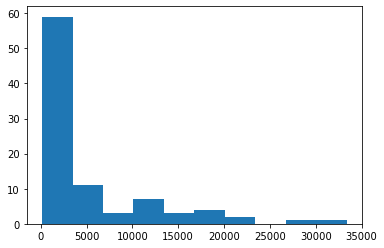

In [23]:
#3 Plot histograms of world wealth for 1960 and 2019.
plt.hist(gm[gm.time == 1960].GDP_PC)

(array([121.,  24.,  12.,   7.,  10.,   6.,   0.,   2.,   2.,   1.]),
 array([   208.07473 ,  11291.620427,  22375.166124,  33458.711821,
         44542.257518,  55625.803215,  66709.348912,  77792.894609,
         88876.440306,  99959.986003, 111043.5317  ]),
 <BarContainer object of 10 artists>)

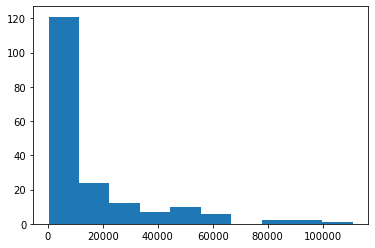

In [24]:
plt.hist(gm[gm.time == 2019].GDP_PC)

In [25]:
#4 Compare these histograms. Comment what do you see.

- The range of x-axis, GDP value, in 2019 is wider than that in 1960. Therefore, the overall GDP value becomes higher.

In [26]:
#5 Compute the quintile share ratio of GDP per capita for 1960 and 2019. What does it tell you–has inequality grown over time?
gm_1960_top_20 = gm_1960[gm_1960.GDP_PC >= gm_1960.GDP_PC.quantile(.8)]
gm_1960_top_20.GDP_PC.sum()

318426.61393

In [27]:
gm_1960_bottom_20 = gm_1960[gm_1960.GDP_PC <= gm_1960.GDP_PC.quantile(.2)]
gm_1960_bottom_20.GDP_PC.sum()

7081.50593

In [28]:
318426.61393 / 7081.50593

44.965946096439964

- The QSR for 1960 is about 44.97

In [29]:
gm_2019_top_20 = gm_2019[gm_2019.GDP_PC >= gm_2019.GDP_PC.quantile(.8)]
gm_2019_top_20.GDP_PC.sum()

1868384.4504999998

In [30]:
gm_2019_bottom_20 = gm_2019[gm_2019.GDP_PC <= gm_2019.GDP_PC.quantile(.2)]
gm_2019_bottom_20.GDP_PC.sum()

32649.716679999998

In [31]:
1868384.4504999998 / 32649.716679999998

57.22513517688509

- The QSR for 2019 is about 57.23

- The QSR for 2019 is bigger than that for 1960, meaning that the inequality has grown over time.

In [199]:
#6 Now compute the Pareto ratio for the same two years. Will your conclusion be the same?
gm_1960_top_20 = gm_1960[gm_1960.GDP_PC >= gm_1960.GDP_PC.quantile(.8)]
gm_1960_top_20.GDP_PC.sum()

318426.61393

In [157]:
gm_1960.GDP_PC.sum()

459576.84862

In [195]:
318426.61393 / 459576.84862

0.6928691357847102

In [196]:
gm_2019_top_20 = gm_2019[gm_2019.GDP_PC >= gm_2019.GDP_PC.quantile(.8)]
gm_2019_top_20.GDP_PC.sum()

1868384.4504999998

In [188]:
gm_2019.GDP_PC.sum()

2785240.16019

In [197]:
1868384.4504999998 / 2785240.16019

0.6708162826334317

- In 1960, top 20% is responsible for about 69% of the total. In 2019, top 20% is responsible for about 67% of the total. It seems that the inequality has not grown over time. My conclusion changed.

In [198]:
#7 What do you think–are these data useful to tell something about how the world inequality has changed over the last 60 years?

- I think that these data can be useful to tell about the inequality, but it is necessary to consider various things and think deeply since conclusions can vary depending on which priciple is used.

### Q.4 Health

In [34]:
#1 How many countries do not have CM data for year 1960? 
#  How many countries do not have this information for year 2019? 
#  So is data improving over time?
gm_1960.childMortality.isna().sum()

104

In [35]:
gm_2019.childMortality.isna().sum()

24

- There are 104 countries that do not have CM data for year 1960, while there are 24 countires for year 2019. It means that the data is improving over time.

In [201]:
#2 What is the largest and smallest CM in data? Which years/countries does this correspond to?
gm.loc[gm.childMortality.nlargest().idxmax()]

iso3                                  MLI
name                                 Mali
iso2                                   ML
region                             Africa
sub-region             Sub-Saharan Africa
intermediate-region        Western Africa
time                               1963.0
totalPopulation                 5441613.0
fertilityRate                       7.011
lifeExpectancy                     28.782
childMortality                      420.6
youthFemaleLiteracy                   NaN
youthMaleLiteracy                     NaN
adultLiteracy                         NaN
GDP_PC                                NaN
accessElectricity                     NaN
agriculturalLand                 317080.0
agricultureTractors                 150.0
cerealProduction                1058200.0
fertilizerHa                      0.21238
co2                               176.016
greenhouseGases                       NaN
co2_PC                            0.03235
pm2.5_35                          

In [200]:
gm.loc[gm.childMortality.nsmallest().idxmin()]

iso3                               SMR
name                        San Marino
iso2                                SM
region                          Europe
sub-region             Southern Europe
intermediate-region                NaN
time                            2018.0
totalPopulation                33785.0
fertilityRate                      NaN
lifeExpectancy                     NaN
childMortality                     1.7
youthFemaleLiteracy              100.0
youthMaleLiteracy                100.0
adultLiteracy                 99.91643
GDP_PC                     50023.78642
accessElectricity                100.0
agriculturalLand                  23.0
agricultureTractors                NaN
cerealProduction                   NaN
fertilizerHa                       NaN
co2                                NaN
greenhouseGases                    NaN
co2_PC                             NaN
pm2.5_35                           NaN
battleDeaths                       NaN
Name: 10587, dtype: objec

- The largest CM in data is 420.6 in Mali in 1963, and the smallest CM in data is 1.7 in San Marino in 2018.

In [74]:
#3 For each continent, which country has the smallest and the largest CM (in 2019)?
gm_2019_min_region = gm.loc[gm_2019.groupby('region')['childMortality'].idxmin()]
gm_2019_min_region[['region','name', 'childMortality']]

,region,name,childMortality
6679,Africa,Libya,11.5
1986,Americas,Canada,4.9
2890,Asia,Cyprus,2.3
10588,Europe,San Marino,1.7
663,Oceania,Australia,3.6


In [75]:
gm_2019_max_region = gm.loc[gm_2019.groupby('region')['childMortality'].idxmax()]
gm_2019_max_region[['region','name', 'childMortality']]

,region,name,childMortality
8603,Africa,Nigeria,117.2
5176,Americas,Haiti,62.8
9144,Asia,Pakistan,67.2
7399,Europe,"Moldova, Republic of",14.4
6199,Oceania,Kiribati,50.9


- In 2019, Libya has the smallest CM, while Nigeria has the largest CM in Africa. Canada has the smallest CM, while Haiti has the largest CM in Americas. Cyprus has the smallest CM, while Pakistan has the largest CM in Asia. San Marino has the smallest CM, while Republic of Moldova has the largest CM is Europe. Australia has the smallest CM, while Kiribati has the largest CM in Oceania.

### Q.5 Graphical Analysis 

<AxesSubplot:xlabel='time', ylabel='childMortality'>

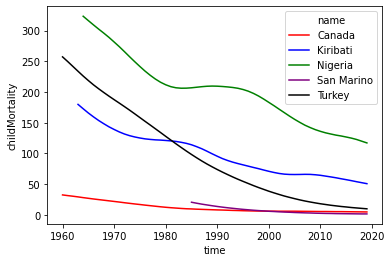

In [203]:
#1 Make a plot of child mortality over time.
sns.lineplot(x="time", y="childMortality", hue="name", 
             data=gm[gm["name"].isin(["San Marino","Nigeria","Turkey", "Canada", "Kiribati"])],
             palette=['red', 'blue', 'green', 'purple', 'black'])

##### Q.How much time did you spend on this PS? 

- I spent about 6 hours.